In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from simulator import simulate


In [ ]:
# Read the Excel file
df = pd.read_excel('Experimental_data_temp700.xlsx')

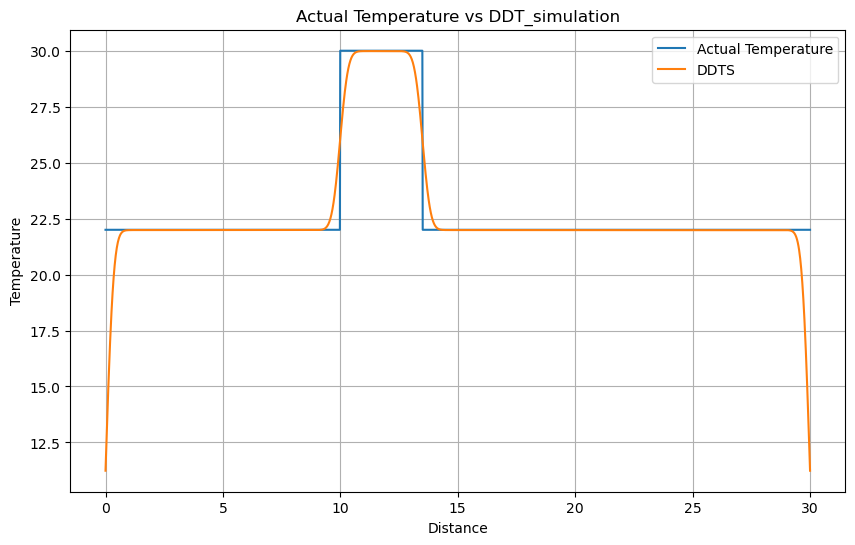

In [9]:
# Test case

H_start = 10
H_stop = 13.5
H_temperature = 30

# Call the simulate function
distance, actual_T, DDTS = simulate(H_start=H_start, H_stop=H_stop, H_temperature=H_temperature)

# Plot DDTS
plt.figure(figsize=(10, 6))
plt.plot(distance,actual_T, label='Actual Temperature')
plt.plot(distance,DDTS, label='DDTS')
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Actual Temperature vs DDT_simulation')
plt.legend()
plt.grid(True)
plt.show()

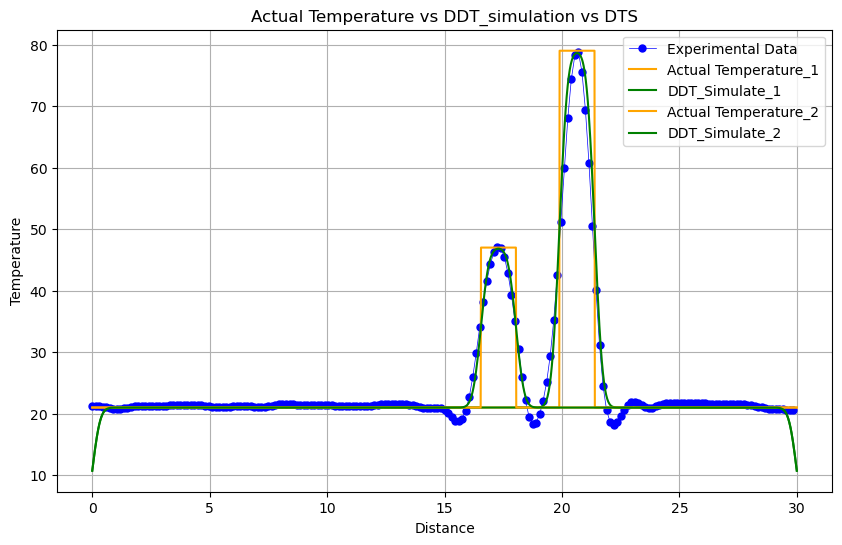

In [5]:

# Extract the data from rows 400 to 500
x = np.array(df.iloc[305:505, 1])  # 2nd column (Trace) 60m - 90m
y = np.array(df.iloc[305:505, 2])  # 3rd column (0)

# Define hot events
hot_events = [
    {'Center_of_temp': 65.80, 'width': 1.5, 'H_temperature': 79},
    {'Center_of_temp': 62.45, 'width': 1.5, 'H_temperature': 47.5}
]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot experimental data
plt.plot(x - np.min(x), y, marker='o', markersize=5, linestyle='-', linewidth=0.5, color='blue', label='Experimental Data')  

# Loop through each hot event and plot DTS simulation results
for i,hot_event in enumerate(hot_events):
    # Calculate H_start and H_stop
    H_start = (hot_event['Center_of_temp'] - np.min(x)) - (hot_event['width'] / 2)
    H_stop = (hot_event['Center_of_temp'] - np.min(x)) + (hot_event['width'] / 2)
    # Simulate DTS data
    distance, actual_T, DDTS = simulate(H_start=H_start, H_stop=H_stop, H_temperature=hot_event['H_temperature'], env_temp=21)

    # Plot DTS simulation results
    plt.plot(distance, actual_T, label=f'Actual Temperature_{i+1}',color='orange')
    plt.plot(distance, DDTS, label=f'DDT_Simulate_{i+1}', color='green')

plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Actual Temperature vs DDT_simulation vs DTS')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
a=np.array([2,5,8])
if any(a) <0:
    print("yes")
%matplotlib qt

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simulator import simulate

def compare_sim_with_experimental(csv_file, start_30m_section, stop_30m_section, step_size=0.15, env_temp=22, spacial_res=1.5):
    # Read experimental data from CSV
    try:
        df = pd.read_csv(csv_file, header=None)
    except FileNotFoundError:
        print("Error: CSV file not found.")
        return

    # Extract data columns
    distance_exp = df.iloc[:, 1]
    temperature_exp = df.iloc[:, 2]

    # Find indices for the 30m section
    start_idx = np.abs(distance_exp - start_30m_section).idxmin()
    stop_idx = np.abs(distance_exp - stop_30m_section).idxmin()

    # Extract data for the 30m section
    distance_30m_section = np.array(distance_exp[start_idx:stop_idx+1])-start_30m_section
    temperature_30m_section = np.array(temperature_exp[start_idx:stop_idx+1])

    # Print number of data points in the 30m section
    num_data_points = len(distance_30m_section)
    print(f"Number of data points in the 30m section: {num_data_points}")

    # Simulate DTS data
    z, actual_T, DDTS = simulate(start=0, stop=30, H_starts=np.array([11,14]), H_stops=np.array([13,17]), H_temperatures=np.array([50,70]), env_temp=21, step_size=step_size, spacial_res=spacial_res)

    # Plot experimental data for the 30m section
    plt.plot( distance_30m_section,temperature_30m_section, label='Experimental Data (30m section)', color='blue', linestyle='--')

    # Plot simulated data
    plt.plot(z, actual_T, label='Simulated Data', color='red')
    plt.plot(z, DDTS, label='Simulated Data', color='black')

    # Customize plot
    plt.xlabel('Distance')
    plt.ylabel('Temperature')
    plt.title('Comparison of Experimental and Simulated Data')
    plt.legend()
    plt.grid(True)
    plt.show()


In [51]:
compare_sim_with_experimental('Experimental_data_temp700.csv',start_30m_section=50,stop_30m_section=80)

Number of data points in the 30m section: 201


In [27]:

df = pd.read_csv('Experimental_data_temp700.csv', header=None)
df

,0,1,2,3,4,5,6
0,0,0.00,24.91,24.30,24.80,24.91,25.07
1,1,0.15,24.64,24.09,24.62,24.69,24.87
2,2,0.30,24.34,23.88,24.41,24.46,24.64
3,3,0.45,24.07,23.69,24.20,24.24,24.42
4,4,0.60,23.87,23.57,24.02,24.06,24.24
...,...,...,...,...,...,...,...
1996,1996,299.40,-273.15,-273.15,-273.15,-273.15,-273.15
1997,1997,299.55,-273.15,-273.15,-273.15,-273.15,-273.15
1998,1998,299.70,-273.15,-273.15,-273.15,-273.15,-273.15
1999,1999,299.85,-273.15,-273.15,-273.15,-273.15,-273.15


In [2]:
from data_generator import generate_dts_data
num_events = 2
env_temp = 22
hotspot_temperatures = [45.0, 55.0, 65.0]  # Example temperatures
num_shift1 = 4
num_shift2 = 4
# Generate the DTS simulation data
z, all_simulations = generate_dts_data(
    num_events=num_events,
    env_temp=env_temp,
    hotspot_temperatures=hotspot_temperatures,
    num_shift1=num_shift1,
    Number_of_random_location=1
)


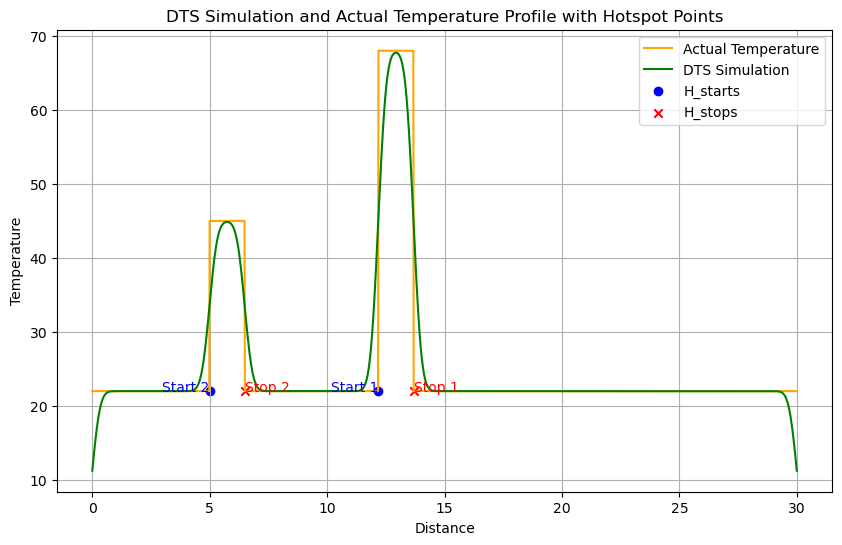

In [29]:
# Select one simulation to plot (for example, the first one)
simulation = all_simulations[0]  # Take the first simulation for plotting

# Extract the actual temperature, DTS, and hotspot start/stop positions
actual_T, DDTS = simulation["X"]
H_starts, H_stops = simulation["Y"]

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the actual temperature profile
plt.plot(z, actual_T, label='Actual Temperature', color='orange')

# Plot the DTS simulation results
plt.plot(z, DDTS, label='DTS Simulation', color='green')

# Mark the H_starts and H_stops points
plt.scatter(H_starts, [env_temp] * len(H_starts), color='blue', marker='o', label='H_starts')
plt.scatter(H_stops, [env_temp] * len(H_stops), color='red', marker='x', label='H_stops')

# Annotate the start and stop points
for i, (start, stop) in enumerate(zip(H_starts, H_stops)):
    plt.text(start, actual_T[i], f'Start {i+1}', ha='right', color='blue')
    plt.text(stop, env_temp, f'Stop {i+1}', ha='left', color='red')

# Finalize the plot
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('DTS Simulation and Actual Temperature Profile with Hotspot Points')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
actual_T[5*150-1]

22